In [ ]:
import tensorflow.keras as K
import tensorflow as tf
def preprocess_data(X, Y):
    X_p = K.applications.inception_v3.preprocess_input(X)
    Y_p = K.utils.to_categorical(Y, 10)
    return X_p, Y_p
CALLBACKS = []
MODEL_PATH = 'cifar10.h5'
optimizer = K.optimizers.Adam()
(x_train, y_train), (x_test, y_test) = K.datasets.cifar10.load_data()
x_train, y_train = preprocess_data(x_train, y_train)
x_test, y_test = preprocess_data(x_test, y_test)
inputs = K.Input(shape=(32, 32, 3))
upscale = K.layers.Lambda(lambda x: tf.image.resize_with_pad(x, 160,160,method=tf.image.ResizeMethod.BILINEAR))(inputs)
base_model = K.applications.inception_v3.InceptionV3(include_top=False,
                                        weights='imagenet',
                                        input_tensor=upscale,
                                        input_shape=(160,160,3),
                                        pooling='max')

out = base_model.output
out = K.layers.Flatten()(out)
out = K.layers.Dense(10, activation='softmax')(out)
CALLBACKS.append(K.callbacks.ModelCheckpoint(filepath=MODEL_PATH,monitor='val_acc',save_best_only=True))
CALLBACKS.append(K.callbacks.EarlyStopping(monitor='val_acc',verbose=1,patience=5))
CALLBACKS.append(K.callbacks.TensorBoard(log_dir='logs'))
model = K.models.Model(inputs=inputs, outputs=out)
model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=['accuracy'])

history= model.fit(x=x_train,
          y=y_train,
          batch_size=128,
          epochs=20,
          callbacks=CALLBACKS,
          validation_data=(x_test, y_test))

Epoch 1/20
391/391 [==============================] - 105s 253ms/step - loss: 0.5830 - accuracy: 0.8111 - val_loss: 0.5247 - val_accuracy: 0.8282
Epoch 2/20
391/391 [==============================] - 103s 262ms/step - loss: 0.2643 - accuracy: 0.9106 - val_loss: 0.4700 - val_accuracy: 0.8441
Epoch 3/20
391/391 [==============================] - 103s 262ms/step - loss: 0.1914 - accuracy: 0.9349 - val_loss: 0.3806 - val_accuracy: 0.8824
Epoch 4/20
391/391 [==============================] - 103s 262ms/step - loss: 0.1597 - accuracy: 0.9455 - val_loss: 0.4118 - val_accuracy: 0.8695
Epoch 5/20
391/391 [==============================] - 103s 263ms/step - loss: 0.1302 - accuracy: 0.9550 - val_loss: 0.4583 - val_accuracy: 0.8706
Epoch 6/20
391/391 [==============================] - 103s 262ms/step - loss: 0.1150 - accuracy: 0.9613 - val_loss: 0.4035 - val_accuracy: 0.8811
Epoch 7/20
391/391 [==============================] - 103s 262ms/step - loss: 0.0939 - accuracy: 0.9675 - val_loss: 0.6250 -

In [ ]:
import numpy as np
def plot_confusion_matrix(cm, classes, normalize, title):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    title_font = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 15}
    label_font = {'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 10}
    plt.title(title, fontdict=title_font)
    plt.ylabel('True label',fontdict=label_font)
    plt.xlabel('Predicted label',fontdict=label_font)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()

In [ ]:
from sklearn.metrics import confusion_matrix  
#### To analyze results, plot the confusion matrix using the following command
#Predict the test results
predict_x=model.predict(x_test) 
y_predict=np.argmax(predict_x,axis=1)
y_test_labels = y_test.argmax(1)
#confusion matrix and classification report
print("Confusion Matrix\n",confusion_matrix(y_test_labels,y_predict))

Confusion Matrix
 [[915   3  10  27   9   4   8   8   5  11]
 [  1 939   0  12   1   0   1   2   2  42]
 [ 18   0 781  58  27  49  45  21   0   1]
 [  2   1   1 847   6  82  46  12   0   3]
 [  4   0   7  31 883  19  25  31   0   0]
 [  0   0   3  92   6 872   7  19   0   1]
 [  0   0   3  12   6   9 969   1   0   0]
 [  1   0   0  21   6  19   1 950   0   2]
 [ 71  17   2  26   0   1   8   8 825  42]
 [  8  23   1   3   0   1   1   3   1 959]]


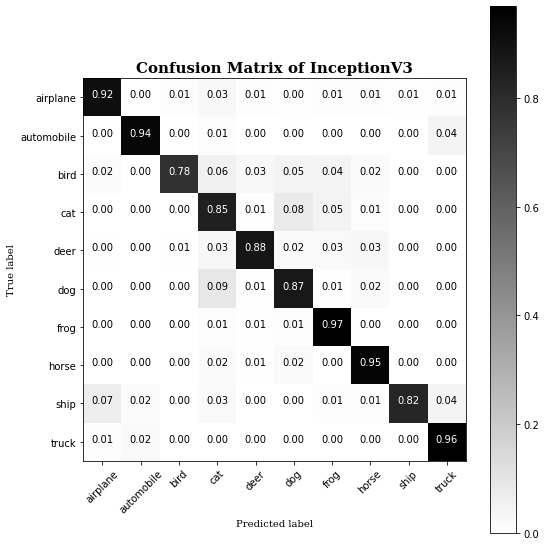

In [ ]:
# Compute confusion matrix
import matplotlib.pyplot as plt
import itertools   
cnf_matrix = confusion_matrix(y_test_labels,y_predict)
np.set_printoptions(precision=2)
label_names = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]
# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=label_names, normalize=True, 
                      title='Confusion Matrix of InceptionV3')

In [ ]:
model.evaluate(x_test, y_test, batch_size=128, verbose=1)

79/79 [==============================] - 6s 73ms/step - loss: 0.4789 - accuracy: 0.8940


[0.47887367010116577, 0.8939999938011169]

In [ ]:
from sklearn.metrics import confusion_matrix
predicted_val = model.predict(x_test)
predicted_val = np.argmax(predicted_val, axis=1)
true_val = np.argmax(y_test, axis=1)
confusion_matrix = confusion_matrix(true_val, predicted_val)

In [ ]:
errors = (predicted_val - true_val !=0)
total_errors = sum(errors)
print(total_errors)
errors_index = np.where(errors==True)
true_value_labels = true_val[errors_index]
pred_value_labels = predicted_val[errors_index]
X_val_errors = x_test[errors_index]

1056


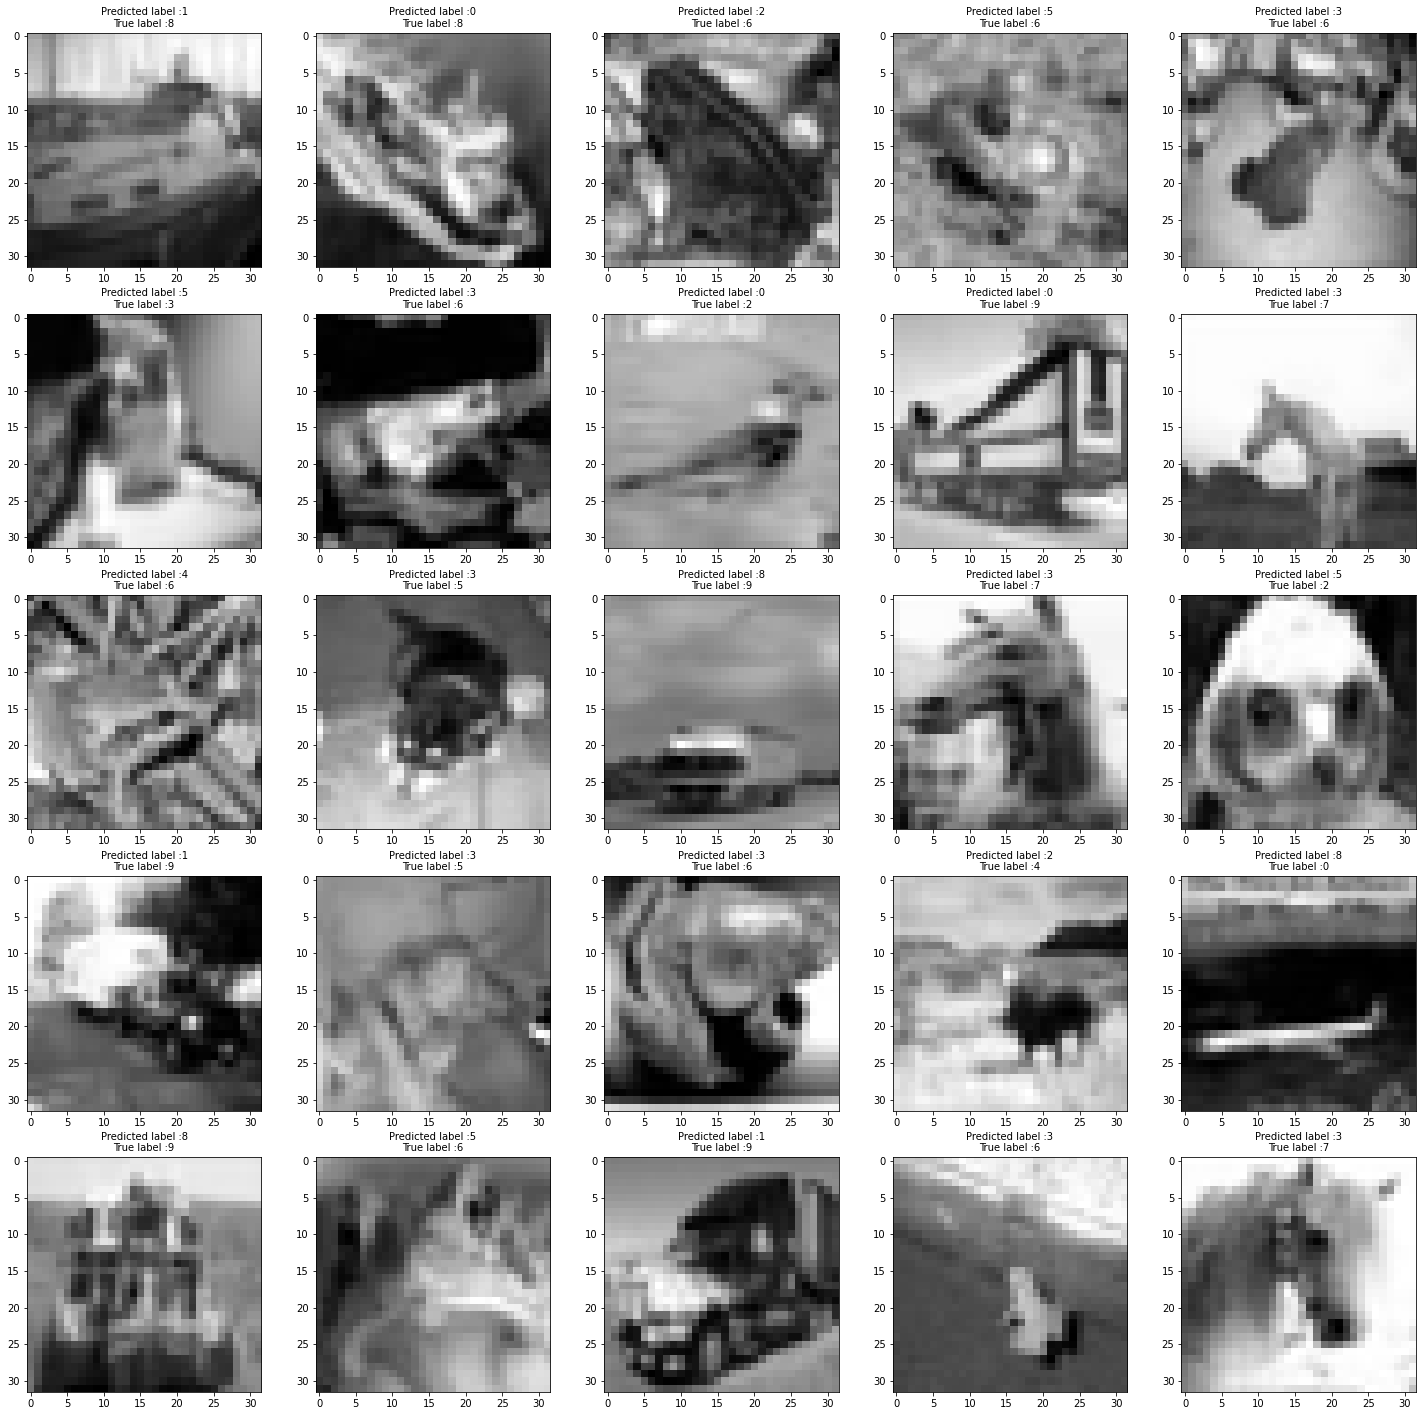

In [ ]:
index = 0
n_rows = 5
n_cols = 5

fig, axis = plt.subplots(n_rows,n_cols,figsize=[25,25])

for row in range(n_rows):
    for col in range(n_cols):
        if index < total_errors:
            axis[row,col].imshow(X_val_errors[index,:,:,0],plt.get_cmap('gray'))
            axis[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_value_labels[index],true_value_labels[index]),fontsize=10)
            index += 1

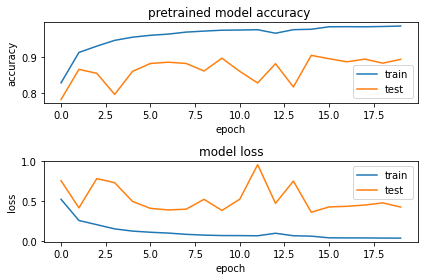

In [ ]:
import os
from math import log
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('pretrained model accuracy ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()